<a href="https://colab.research.google.com/github/susanemiliaw/NTHU_2025_DLIA_HW/blob/main/113034421_HW1_IntrotoAI_SUSAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Package

In [1]:
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Gradient boosting library (optional)
try:
    import xgboost as xgb
    from xgboost import XGBRegressor
except Exception as e:
    XGBRegressor = None

# Metrics — MAE
from sklearn.metrics import mean_absolute_error

# Niceties
pd.set_option('display.float_format', '{:.3f}'.format)
import warnings
warnings.filterwarnings("ignore")

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Imports ready.")


Imports ready.


### Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/IntrotoAI/train.csv'
test_path  = '/content/drive/MyDrive/IntrotoAI/test.csv'

import pandas as pd
df = pd.read_csv(train_path)
print("Train data loaded!")
print("Shape:", df.shape)

df.head()

Train data loaded!
Shape: (10108, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,2008/9/30,Female,Service,No,2,3.000,3.800,0.160
1,1,2008/11/30,Male,Service,Yes,1,2.000,5.000,0.360
2,2,2008/3/10,Female,Product,Yes,2,NaN,5.800,0.490
3,3,2008/11/3,Male,Service,Yes,1,1.000,2.600,0.200
4,4,2008/7/24,Female,Service,No,3,7.000,6.900,0.520


In [4]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [5]:
#overview information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           10108 non-null  int64  
 1   Date of Joining       10108 non-null  object 
 2   Gender                10108 non-null  object 
 3   Company Type          10108 non-null  object 
 4   WFH Setup Available   10108 non-null  object 
 5   Designation           10108 non-null  int64  
 6   Resource Allocation   9478 non-null   float64
 7   Mental Fatigue Score  9142 non-null   float64
 8   Burn Rate             9624 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 710.8+ KB


In [6]:
#statistical measures in the data
df.describe()

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,10108.000,10108.000,9478.000,9142.000,9624.000
mean,5053.500,2.183,4.497,5.731,0.452
std,2918.073,1.143,2.053,1.922,0.199
min,0.000,0.000,1.000,0.000,0.000
25%,2526.750,1.000,3.000,4.500,0.320
50%,5053.500,2.000,4.000,5.900,0.450
75%,7580.250,3.000,6.000,7.100,0.590
max,10107.000,5.000,10.000,10.000,1.000


In [7]:
#number of null values in the data
df.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,630
Mental Fatigue Score,966
Burn Rate,484


In [8]:
#number of duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]

# Check if all these columns actually exist in the dataframe
print("Checking unique values in categorical features:\n")
for column in categorical_columns:
    if column in df.columns:
        print(f"{column}: {df[column].unique()}")
        print("-" * 40)
    else:
        print(f"Column '{column}' not found in dataset!")


Checking unique values in categorical features:

Gender: ['Female' 'Male']
----------------------------------------
Company Type: ['Service' 'Product']
----------------------------------------
WFH Setup Available: ['No' 'Yes']
----------------------------------------


In [10]:
#data types of the data
df.dtypes

,0
Employee ID,int64
Date of Joining,object
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


### Check Missing Value

In [11]:
import pandas as pd
df = pd.read_csv(train_path)

# ID is identifier → string
df['Employee ID'] = df['Employee ID'].astype(str)

print("Shape:", df.shape)
df.head(3)


Shape: (10108, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,2008/9/30,Female,Service,No,2,3.000,3.800,0.160
1,1,2008/11/30,Male,Service,Yes,1,2.000,5.000,0.360
2,2,2008/3/10,Female,Product,Yes,2,NaN,5.800,0.490


In [12]:
print("Missing before:\n", df.isna().sum(), "\n")

for col in ['Company Type', 'Gender', 'WFH Setup Available']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Cek
print("Missing after:\n", df.isna().sum())


Missing before:
 Employee ID               0
Date of Joining           0
Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation     630
Mental Fatigue Score    966
Burn Rate               484
dtype: int64 

Missing after:
 Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


In [13]:
#Drop Unnecessary Columns

# Create a copy for modeling
data_cleaned = df.copy()

# Drop columns that are not useful for prediction
columns_to_drop = ['Employee ID', 'Date of Joining']

# Drop only if they exist (safe coding practice)
data_cleaned = data_cleaned.drop(columns=[col for col in columns_to_drop if col in data_cleaned.columns])

print("Columns dropped successfully.")
print("Remaining columns for modeling:\n", data_cleaned.columns.tolist())

# Quick preview of the cleaned dataset
data_cleaned.head()

Columns dropped successfully.
Remaining columns for modeling:
 ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']


,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.000,3.800,0.160
1,Male,Service,Yes,1,2.000,5.000,0.360
2,Female,Product,Yes,2,4.497,5.800,0.490
3,Male,Service,Yes,1,1.000,2.600,0.200
4,Female,Service,No,3,7.000,6.900,0.520


Missing counts (raw):
 Mental Fatigue Score    966
Resource Allocation     630
Burn Rate               484
dtype: int64 



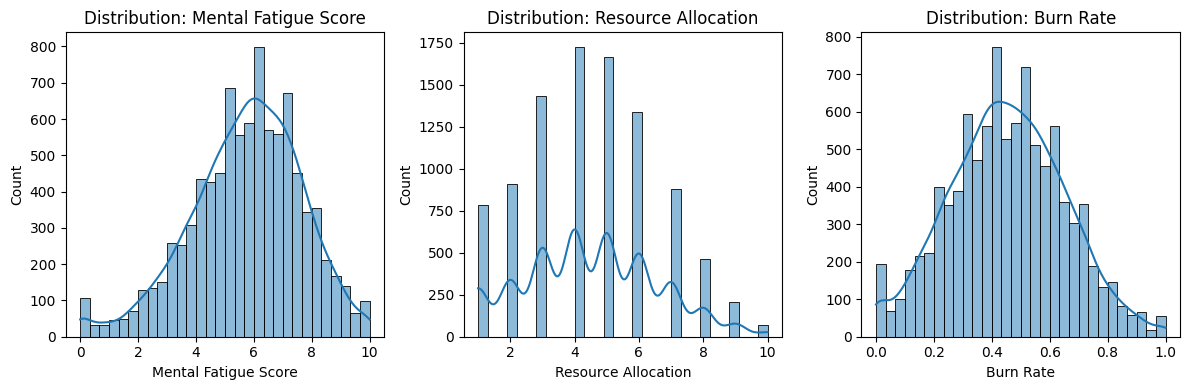

Skewness:
 Mental Fatigue Score   -0.440
Resource Allocation     0.206
Burn Rate               0.045
dtype: float64


In [14]:
# Explore distributions BEFORE imputation (reload raw)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw = pd.read_csv(train_path)

cols_to_check = ['Mental Fatigue Score', 'Resource Allocation', 'Burn Rate']  # tambah/kurangi sesuai perlu
print("Missing counts (raw):\n", raw[cols_to_check].isna().sum(), "\n")

fig = plt.figure(figsize=(12, 4))
for i, col in enumerate(cols_to_check, 1):
    ax = fig.add_subplot(1, len(cols_to_check), i)
    sns.histplot(raw[col], kde=True, bins=30, ax=ax)
    ax.set_title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

# Quick skewness to guide imputation choice
skews = raw[cols_to_check].skew(numeric_only=True)
print("Skewness:\n", skews)


Correlation Analysis

In [15]:
#correlation
numerical_columns = ["Resource Allocation", "Mental Fatigue Score", "Burn Rate"]
df[numerical_columns].corr()

,Resource Allocation,Mental Fatigue Score,Burn Rate
Resource Allocation,1.000,0.739,0.810
Mental Fatigue Score,0.739,1.000,0.878
Burn Rate,0.810,0.878,1.000


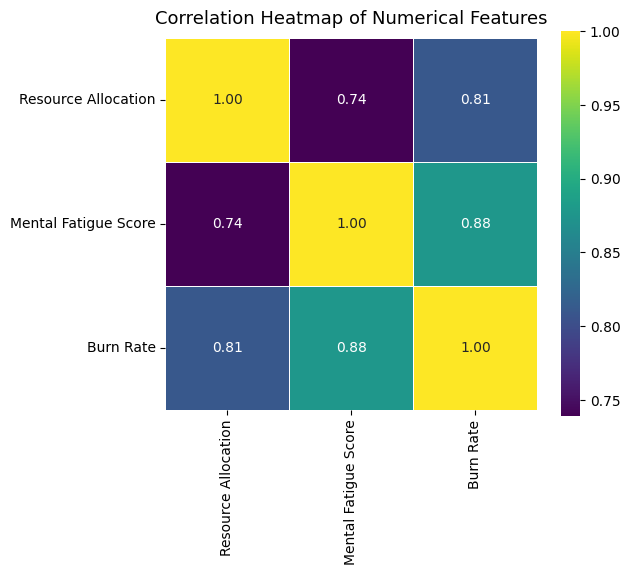

In [16]:
# Heatmap (Visualization)
plt.figure(figsize=(6, 5))
sns.heatmap(
    df[numerical_columns].corr(),
    cbar=True,
    square=True,
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=13, pad=10)
plt.show()


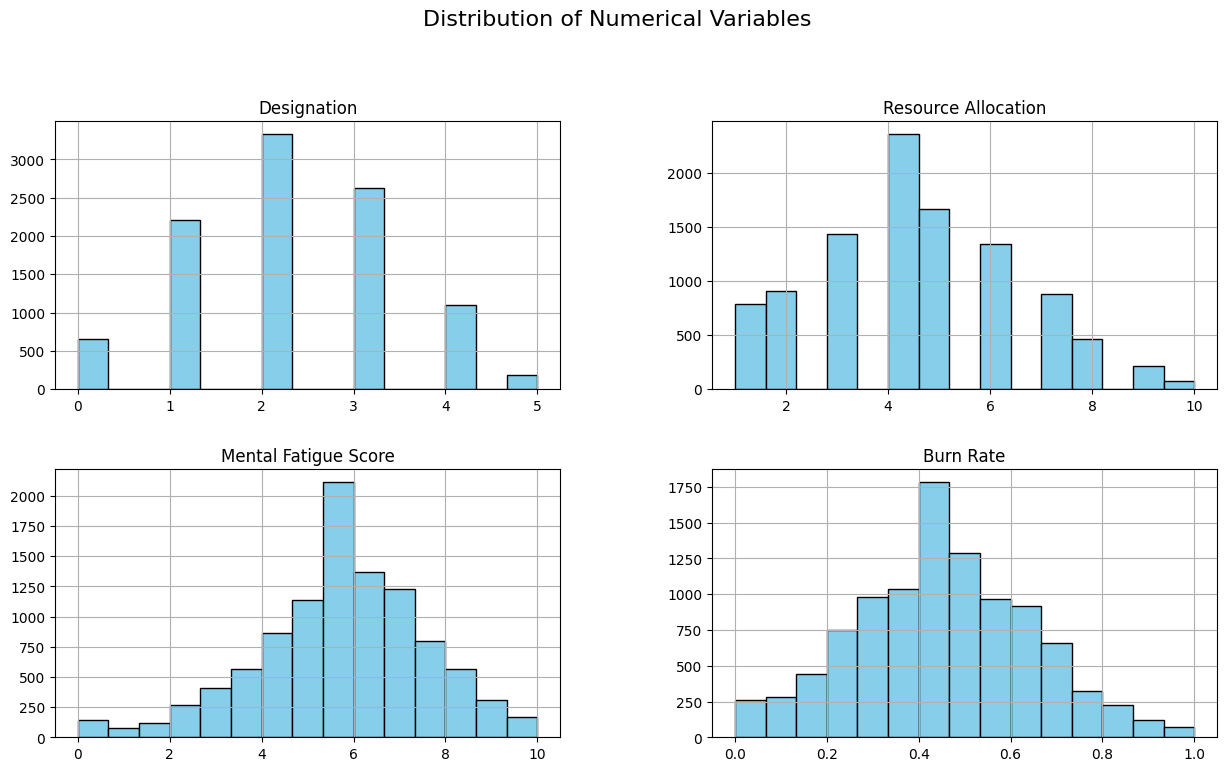

In [17]:
#Histograms for Numerical Features
df.hist(bins=15, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16, y=1.02)
plt.show()


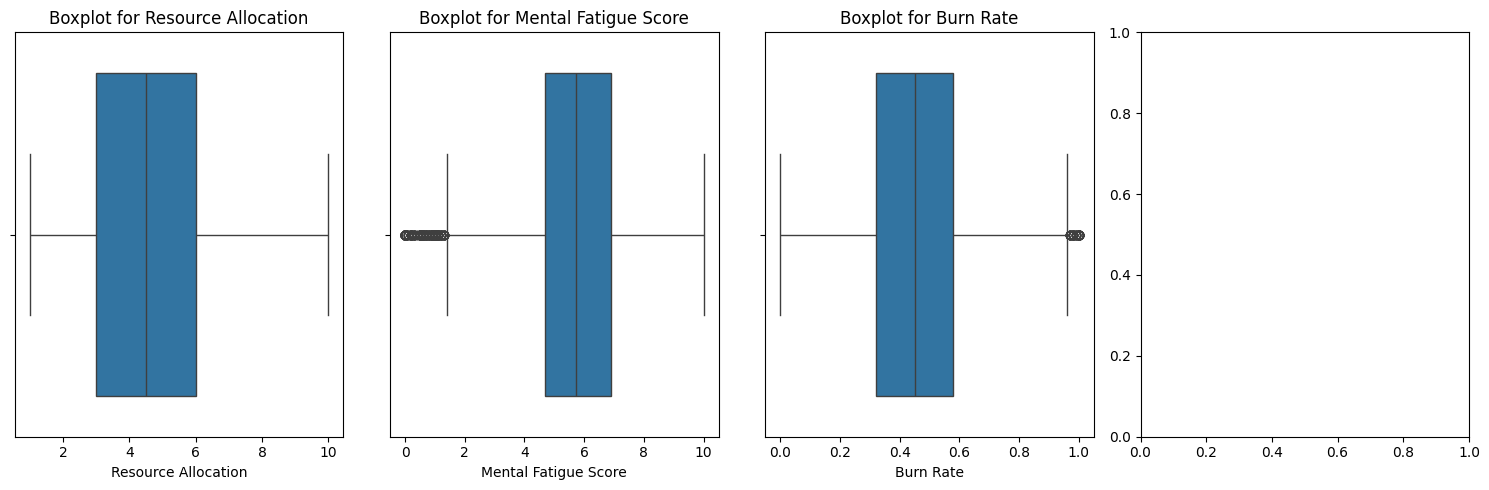

In [18]:
#boxplots to detect the outliers
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')


plt.tight_layout()
plt.show()

Bivariate Analysis

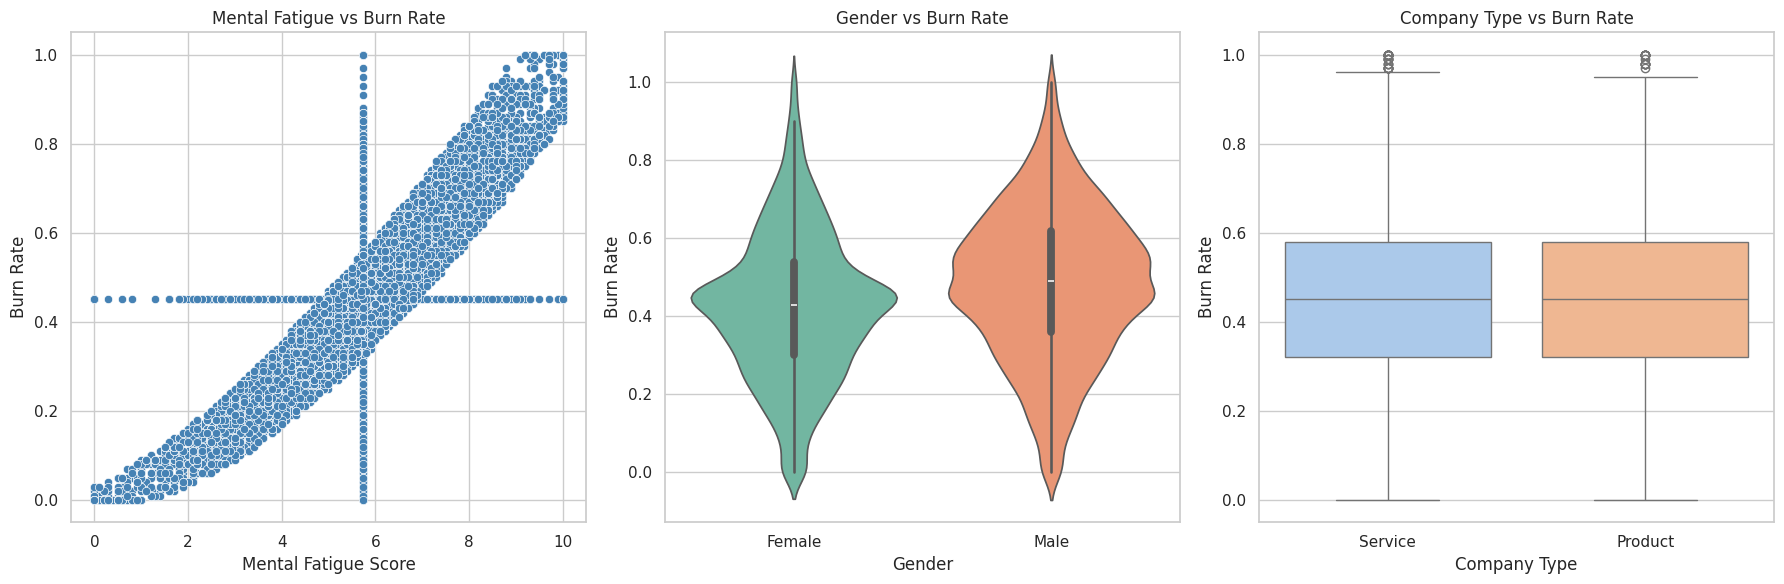

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Mental Fatigue Score vs Burn Rate
sns.scatterplot(
    x='Mental Fatigue Score', y='Burn Rate', data=data_cleaned, ax=ax[0], color='steelblue'
)
ax[0].set_title("Mental Fatigue vs Burn Rate")

#  Gender vs Burn Rate
sns.violinplot(
    x='Gender', y='Burn Rate', data=data_cleaned, ax=ax[1], palette='Set2'
)
ax[1].set_title("Gender vs Burn Rate")

# Company Type vs Burn Rate
sns.boxplot(
    x='Company Type', y='Burn Rate', data=data_cleaned, ax=ax[2], palette='pastel'
)
ax[2].set_title("Company Type vs Burn Rate")

plt.tight_layout()
plt.show()


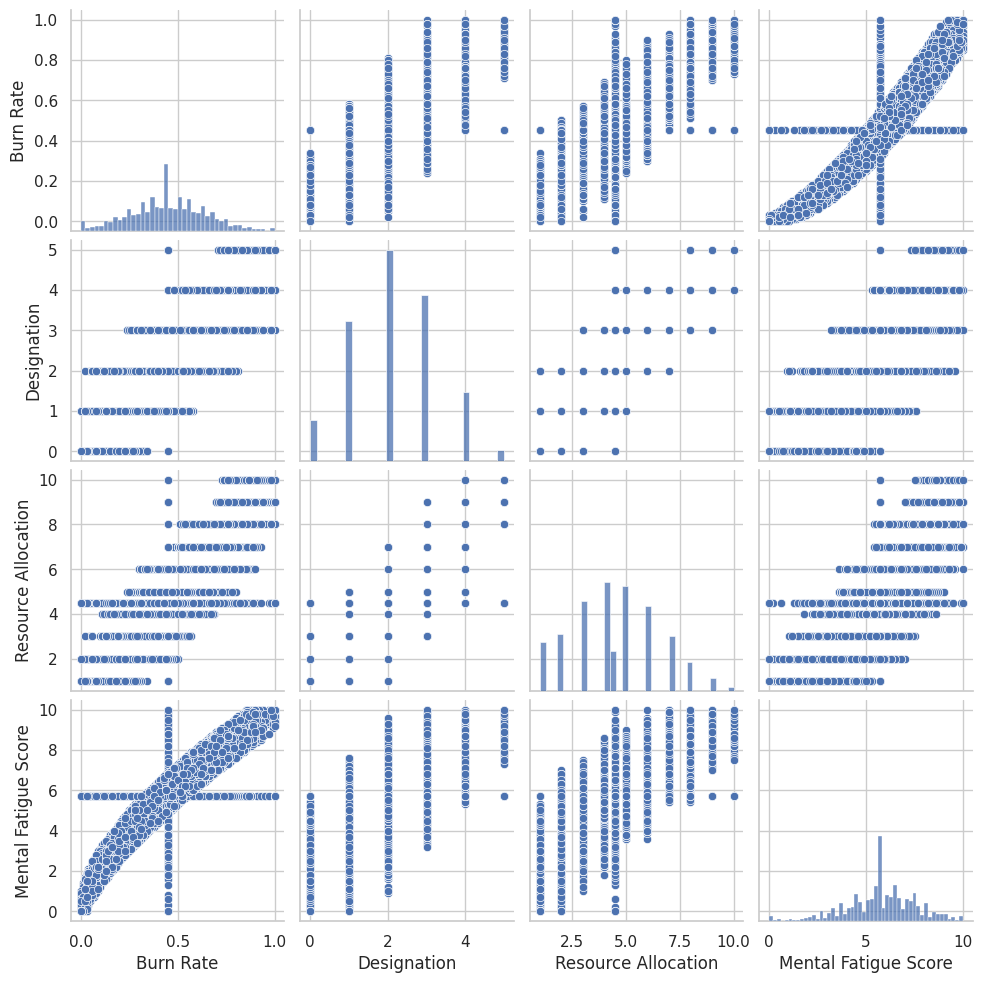

In [20]:
sns.pairplot(data_cleaned[['Burn Rate','Designation','Resource Allocation','Mental Fatigue Score']])

### Training (model construction)

In [21]:
#  Train–Test Split
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data_cleaned.drop('Burn Rate', axis=1)
y = data_cleaned['Burn Rate']

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8086, 6)
Testing set shape: (2022, 6)


In [22]:
#  Linear Regression (Baseline Model)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define categorical and numerical columns
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']
numerical_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']

# Preprocessing: OneHotEncode categoricals, keep numerical as-is
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Combine preprocessing + model into a pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression Results:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Linear Regression Results:
MAE:  0.0583
RMSE: 0.0817


### Cross validation Linear Regression as Baseline Model

- usually we will do cross validation to evaluate the generalization of model
- or you can just use ```sklearn.model_selection.train_test_split``` to evaluate your model

In [23]:
# Cross-Validation for Baseline Model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Use MAE as scoring
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    linear_pipeline, X, y, cv=kf, scoring=mae_scorer
)

print(f"Cross-validation MAE scores: {np.abs(cv_scores)}")
print(f"Average CV MAE: {np.abs(cv_scores.mean()):.4f}")


Cross-validation MAE scores: [0.05827475 0.05790348 0.05887895 0.05620208 0.05783442]
Average CV MAE: 0.0578


Model Comparison

,Model,MAE,RMSE
0,Gradient Boosting,0.0534,0.0744
1,XGBoost,0.0541,0.0757
2,KNN Regressor,0.0578,0.0795
3,Linear Regression,0.0583,0.0817
4,Random Forest,0.0588,0.0812
5,Decision Tree,0.0649,0.0901


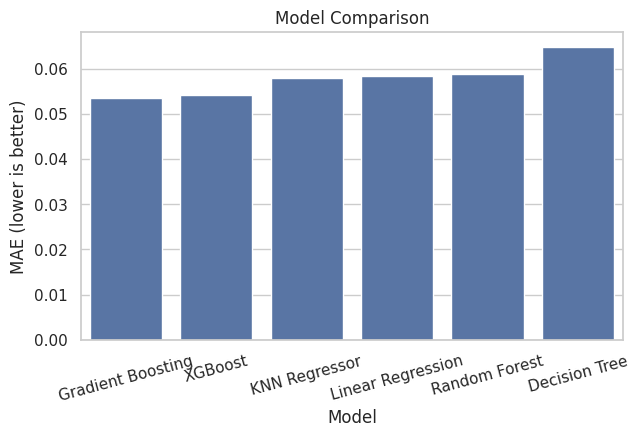

 Best model: Gradient Boosting (MAE=0.0534)


In [24]:
#  Model Comparison (incl. Linear Regression)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Try XGBoost (skip if not installed)
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except:
    HAS_XGB = False
    print("XGBoost not installed; skipping. (Install with: !pip install xgboost)")

candidates = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree",     DecisionTreeRegressor(random_state=42)),
    ("Random Forest",     RandomForestRegressor(n_estimators=300, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)),
    ("KNN Regressor",     KNeighborsRegressor(n_neighbors=7))
]
if HAS_XGB:
    candidates.append(
        ("XGBoost", XGBRegressor(
            n_estimators=500, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, random_state=42
        ))
    )

results = []
for name, est in candidates:
    pipe = Pipeline([('preprocessor', preprocessor), ('model', est)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results.append((name, mae, rmse, pipe))

# Table
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "Pipeline"]).sort_values("MAE").reset_index(drop=True)
display(results_df[["Model","MAE","RMSE"]].style.format({'MAE':'{:.4f}','RMSE':'{:.4f}'}))

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="MAE", data=results_df)
plt.ylabel("MAE (lower is better)"); plt.title("Model Comparison")
plt.xticks(rotation=15); plt.show()

# Keep best pipeline for later submission
best_model_name = results_df.loc[0, "Model"]
best_pipeline  = results_df.loc[0, "Pipeline"]
print(f" Best model: {best_model_name} (MAE={results_df.loc[0,'MAE']:.4f})")



In [28]:
# Fit Gradient Boosting pipeline
gbr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Company Type',
                                                   'WFH Setup Available'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

### Cross Validation for Gradient Boosting
  

In [25]:
#  Cross-Validation for Best Model: Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

# Pipeline = preprocessing + model
gbr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=300,    #HYPERPARAMETER DEFAULTS
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# 5-fold CV with MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores = cross_val_score(gbr_pipe, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)

print("Fold MAE:", np.round(np.abs(cv_scores), 4))
print("Average CV MAE:", np.abs(cv_scores).mean().round(4), "±", np.abs(cv_scores).std().round(4))


Fold MAE: [0.0534 0.0531 0.054  0.0527 0.0531]
Average CV MAE: 0.0533 ± 0.0004


### Plot Actual vs Predicted (Gradient Boosting)


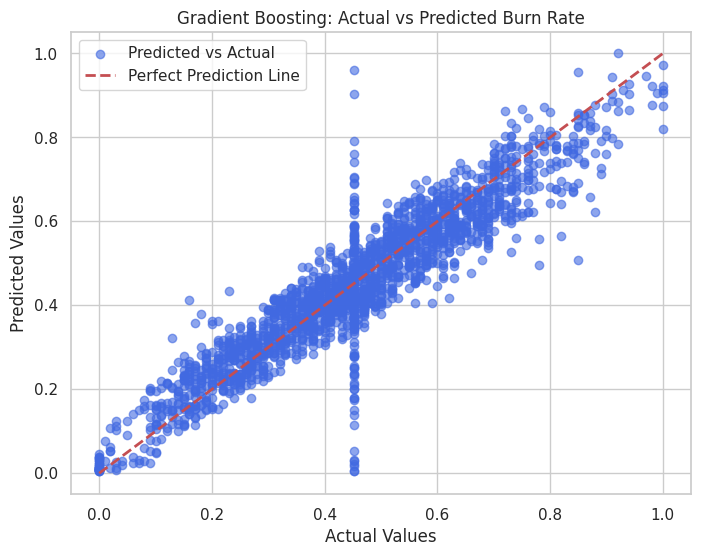

In [26]:
# Actual vs Predicted Plot for Gradient Boosting
import matplotlib.pyplot as plt
import numpy as np

# Fit the best model again on the full training data
best_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Use pipeline (with preprocessing)
gbr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

gbr_pipe.fit(X_train, y_train)
y_pred = gbr_pipe.predict(X_test)

# ===== Scatter Plot: Actual vs Predicted =====
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Gradient Boosting: Actual vs Predicted Burn Rate')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


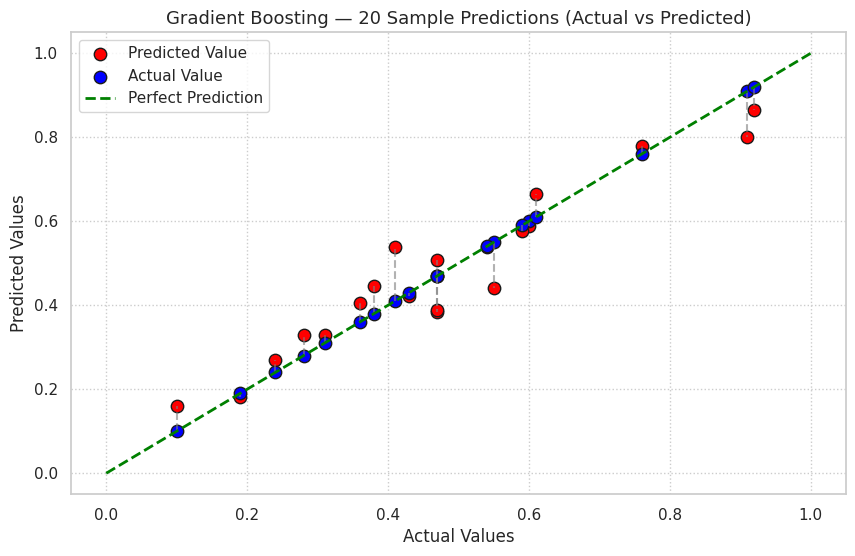

In [27]:
# Visualize 20 Sample Predictions (Gradient Boosting)
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Sample 20 equally spaced points
indices = np.linspace(0, len(y_test) - 1, 20, dtype=int)
y_test_sampled = y_test[indices]
y_pred_sampled = y_pred[indices]

plt.figure(figsize=(10, 6))

# Plot sample pairs with connecting lines
for i in range(len(y_test_sampled)):
    plt.scatter(y_test_sampled[i], y_pred_sampled[i], color='red', edgecolor='k', s=80, label='Predicted Value' if i == 0 else "")
    plt.scatter(y_test_sampled[i], y_test_sampled[i], color='blue', edgecolor='k', s=80, label='Actual Value' if i == 0 else "")
    plt.plot([y_test_sampled[i], y_test_sampled[i]],
             [y_test_sampled[i], y_pred_sampled[i]],
             color='gray', linestyle='--', alpha=0.6)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='green', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Gradient Boosting — 20 Sample Predictions (Actual vs Predicted)', fontsize=13)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.grid(True, linestyle=':')
plt.show()


### Output .csv for submission

In [33]:
print(test_df.columns)

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score'],
      dtype='object')


In [31]:
#  Final: predict test set with Gradient Boosting and create submission.csv
import numpy as np
import pandas as pd

# Load test (if not already loaded)
test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)

# Fill missing values using the same strategy as training
for c in ['Company Type', 'Gender', 'WFH Setup Available']:
    if c in test_df.columns:
        test_df[c].fillna(test_df[c].mode()[0], inplace=True)

for c in ['Designation', 'Resource Allocation', 'Mental Fatigue Score']:
    if c in test_df.columns:
        test_df[c].fillna(test_df[c].mean(), inplace=True)

# Drop columns not used as features (must match training features)
X_test_submit = test_df.drop(columns=['Employee ID', 'Date of Joining'], errors='ignore')

# 4) Predict with your trained Gradient Boosting pipeline
y_pred_test = gbr_pipe.predict(X_test_submit)

# Keep predictions in the valid range [0, 1] just in case
y_pred_test = np.clip(y_pred_test, 0, 1)

# Build submission and save
submission = pd.DataFrame({
    'Employee ID': test_df['Employee ID'],
    'Burn Rate': y_pred_test
})
submission.to_csv('submission.csv', index=False)

print("submission.csv created. Preview:")
display(submission.head())


submission.csv created. Preview:


,Employee ID,Burn Rate
0,0,0.009
1,1,0.716
2,2,0.760
3,3,0.408
4,4,0.508


In [ ]:
from google.colab import files
files.download('submission.csv')


#HyperParameter Tuning & Model Evaluation
Using RandomizedSearchCV

In [32]:
#  RandomizedSearchCV for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

gbr = GradientBoostingRegressor(random_state=42)

pipe_gbr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gbr)
])

# Wide but reasonable search space
param_dist = {
    'model__n_estimators':        [150, 200, 300, 400, 500, 700],
    'model__learning_rate':       [0.01, 0.02, 0.03, 0.05, 0.08, 0.1],
    'model__max_depth':           [2, 3, 4, 5],
    'model__min_samples_split':   [2, 5, 10],
    'model__min_samples_leaf':    [1, 2, 4],
    'model__subsample':           [0.8, 0.9, 1.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

rs = RandomizedSearchCV(
    estimator=pipe_gbr,
    param_distributions=param_dist,
    n_iter=60,               # 30-60 for speed
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs.fit(X, y)
print("Best CV MAE:", -rs.best_score_)
print("Best Params:", rs.best_params_)

best_gbr_pipe = rs.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best CV MAE: 0.05292835664032656
Best Params: {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__learning_rate': 0.02}


In [34]:
# Fine GridSearch around the best found by RandomizedSearch
from sklearn.model_selection import GridSearchCV

bp = rs.best_params_
print("Starting fine tuning around:", bp)

grid = {
    'model__n_estimators':  [bp['model__n_estimators']-100, bp['model__n_estimators'], bp['model__n_estimators']+100],
    'model__learning_rate': [max(0.01, bp['model__learning_rate']-0.01), bp['model__learning_rate'], bp['model__learning_rate']+0.01],
    'model__max_depth':     [max(2, bp['model__max_depth']-1), bp['model__max_depth'], bp['model__max_depth']+1],
    'model__subsample':     [0.8, bp['model__subsample'], 1.0],
    'model__min_samples_leaf': [bp['model__min_samples_leaf']]
}

gs = GridSearchCV(
    estimator=rs.best_estimator_,
    param_grid=grid,
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gs.fit(X, y)
print("Refined Best CV MAE:", -gs.best_score_)
print("Refined Best Params:", gs.best_params_)

best_gbr_pipe = gs.best_estimator_


Starting fine tuning around: {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__learning_rate': 0.02}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Refined Best CV MAE: 0.052890613284312216
Refined Best Params: {'model__learning_rate': 0.02, 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__n_estimators': 400, 'model__subsample': 0.8}


In [35]:
# ===== Evaluate refined tuned Gradient Boosting on holdout test split =====
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

best_params = {
    'n_estimators': 400,     # from fine grid
    'learning_rate': 0.02,
    'max_depth': 5,
    'min_samples_leaf': 4,
    'subsample': 0.8,
    'random_state': 42
}

gbr_tuned = GradientBoostingRegressor(**best_params)

gbr_tuned_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gbr_tuned)
])

gbr_tuned_pipe.fit(X_train, y_train)
y_pred = gbr_tuned_pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Tuned GBR — MAE: {mae:.5f} | RMSE: {rmse:.5f}")



Tuned GBR — MAE: 0.05292 | RMSE: 0.07403


In [36]:
# Refit tuned GBR on data and create submission
# Refit on all training data (X, y)
gbr_tuned_pipe.fit(X, y)

# Load test set and apply same cleaning as before
test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)

for c in ['Company Type','Gender','WFH Setup Available']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mode()[0], inplace=True)
for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mean(), inplace=True)

X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

# Predict and clip to [0,1] just in case
pred = np.clip(gbr_tuned_pipe.predict(X_test_submit), 0, 1)

submission = pd.DataFrame({
    'Employee ID': test_df['Employee ID'],
    'Burn Rate': pred
})
submission.to_csv('second.csv', index=False)
print(" New submission.csv created with tuned Gradient Boosting.")
submission.head()


 New submission.csv created with tuned Gradient Boosting.


,Employee ID,Burn Rate
0,0,0.017
1,1,0.731
2,2,0.745
3,3,0.414
4,4,0.505


In [38]:
from google.colab import files
files.download('second.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
#Refit tuned GBR on ALL data and create submission (refined params)
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Build FINAL tuned model with refined best params
final_gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.02,
    max_depth=5,
    min_samples_leaf=4,
    subsample=0.8,
    random_state=42
)

final_pipe = Pipeline([
    ('preprocessor', preprocessor),  # uses your OneHotEncoder etc.
    ('model', final_gbr)
])

# Fit on ALL training data
final_pipe.fit(X, y)

# Load & clean test set (same strategy as training)
test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)

for c in ['Company Type','Gender','WFH Setup Available']:
    if c in test_df.columns:
        test_df[c].fillna(test_df[c].mode()[0], inplace=True)

for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    if c in test_df.columns:
        test_df[c].fillna(test_df[c].mean(), inplace=True)

# Align test features with training (drop non-features)
X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

# Predict & clip to [0, 1]
pred = np.clip(final_pipe.predict(X_test_submit), 0, 1)

# Build submission and save
submission = pd.DataFrame({
    'Employee ID': test_df['Employee ID'],
    'Burn Rate': pred
})

submission.to_csv('submission_tuned_gbr.csv', index=False)
print(" New submission_tuned_gbr.csv created with refined Gradient Boosting.")
submission.head()


 New submission_tuned_gbr.csv created with refined Gradient Boosting.


,Employee ID,Burn Rate
0,0,0.017
1,1,0.731
2,2,0.745
3,3,0.414
4,4,0.505


In [40]:
from google.colab import files
files.download('submission_tuned_gbr.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Some Tips
1. try different scaling approach (numerical variable)
2. encoding method
3. different model
4. feature engineering (some different transformation)
5. do some data exploration to see other pattern
6. hyperparameter

### Other Complementary
- pipeline: https://scikit-learn.org/stable/modules/compose.html#pipeline
- also can try some basic deep learning model (ANN)

In [38]:
# ===== More-seed Ensemble for tuned GBR =====
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

base_params = dict(
    n_estimators=400, learning_rate=0.02, max_depth=5,
    min_samples_leaf=4, subsample=0.8
)

# try 10 seeds
seeds = [11,22,33,44,55,66,77,88,99,111]

def make_pipe(seed):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(random_state=seed, **base_params))
    ])

# holdout check
preds_val = []
for s in seeds:
    p = make_pipe(s); p.fit(X_train, y_train)
    preds_val.append(p.predict(X_test))

preds_val = np.vstack(preds_val)
pred_mean = preds_val.mean(axis=0)
mae_ens = mean_absolute_error(y_test, pred_mean)
print(f"Holdout MAE (10-seed ensemble): {mae_ens:.5f}")

# final submission with all seeds
test_df = pd.read_csv(test_path)
for c in ['Company Type','Gender','WFH Setup Available']:
    test_df[c].fillna(test_df[c].mode()[0], inplace=True)
for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    test_df[c].fillna(test_df[c].mean(), inplace=True)
X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

test_preds = []
for s in seeds:
    p = make_pipe(s); p.fit(X, y)
    test_preds.append(p.predict(X_test_submit))
sub_pred = np.clip(np.mean(test_preds, axis=0), 0, 1)

submission = pd.DataFrame({'Employee ID': test_df['Employee ID'].astype(str),
                           'Burn Rate': sub_pred})
submission.to_csv('submission_ensemble_gbr_10seeds.csv', index=False)
print("submission_ensemble_gbr_10seeds.csv saved.")



Holdout MAE (10-seed ensemble): 0.05289
submission_ensemble_gbr_10seeds.csv saved.


In [42]:
from google.colab import files
files.download('submission_ensemble_gbr_10seeds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# ===== 3-model blend: GBR (tuned) + RF + ExtraTrees =====
import numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor

# Pipelines
gbr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=400, learning_rate=0.02, max_depth=5,
        min_samples_leaf=4, subsample=0.8, random_state=42))
])

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=800, max_depth=None, min_samples_leaf=1,
        n_jobs=-1, random_state=42))
])

et_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ExtraTreesRegressor(
        n_estimators=800, max_depth=None, min_samples_leaf=1,
        n_jobs=-1, random_state=42))
])

# Fit on train split for weight search
for p in (gbr_pipe, rf_pipe, et_pipe):
    p.fit(X_train, y_train)

p_g = gbr_pipe.predict(X_test)
p_r = rf_pipe.predict(X_test)
p_e = et_pipe.predict(X_test)

# Grid cari bobot di simpleks (w_g + w_r + w_e = 1)
best = (0,0,0,1e9)
for w_g in np.linspace(0.70, 0.95, 6):        # GBR dominan
    for w_r in np.linspace(0.00, 0.25, 6):
        w_e = 1.0 - w_g - w_r
        if w_e < 0:
            continue
        blend = np.clip(w_g*p_g + w_r*p_r + w_e*p_e, 0, 1)
        mae = mean_absolute_error(y_test, blend)
        if mae < best[3]:
            best = (w_g, w_r, w_e, mae)

wg, wr, we, mae_best = best
print(f"Best weights (GBR, RF, ET) = ({wg:.2f}, {wr:.2f}, {we:.2f}) | Holdout MAE = {mae_best:.5f}")

# Refit ketiganya di ALL data & buat submission
for p in (gbr_pipe, rf_pipe, et_pipe):
    p.fit(X, y)

test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)
for c in ['Company Type','Gender','WFH Setup Available']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mode()[0], inplace=True)
for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mean(), inplace=True)

X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

pred = np.clip(wg*gbr_pipe.predict(X_test_submit)
               + wr*rf_pipe.predict(X_test_submit)
               + we*et_pipe.predict(X_test_submit), 0, 1)

submission = pd.DataFrame({'Employee ID': test_df['Employee ID'], 'Burn Rate': pred})
submission.to_csv('submission_blend_gbr_rf_et.csv', index=False)
print("Saved: submission_blend_gbr_rf_et.csv")
submission.head()


Best weights (GBR, RF, ET) = (0.95, 0.05, 0.00) | Holdout MAE = 0.05295
Saved: submission_blend_gbr_rf_et.csv


,Employee ID,Burn Rate
0,0,0.016
1,1,0.733
2,2,0.747
3,3,0.414
4,4,0.504


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import numpy as np

gbr_mae = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        loss='absolute_error',          # LAD loss
        n_estimators=400, learning_rate=0.02, max_depth=5,
        min_samples_leaf=4, subsample=0.8, random_state=42))
])

gbr_mae.fit(X_train, y_train)
pred_mae = gbr_mae.predict(X_test)
print("Holdout MAE (GBR with absolute_error):", mean_absolute_error(y_test, pred_mae))


Holdout MAE (GBR with absolute_error): 0.052882458780593215


In [41]:
#Final submission: Gradient Boosting with MAE loss
import numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

gbr_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        loss='absolute_error',      # best setting
        n_estimators=400,
        learning_rate=0.02,
        max_depth=5,
        min_samples_leaf=4,
        subsample=0.8,
        random_state=42))
])

# Fit on all data
gbr_final.fit(X, y)

# Load & clean test data
test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)

for c in ['Company Type','Gender','WFH Setup Available']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mode()[0], inplace=True)
for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mean(), inplace=True)

X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

# Predict & clip
pred_final = np.clip(gbr_final.predict(X_test_submit), 0, 1)

# Save submission
submission_final = pd.DataFrame({
    'Employee ID': test_df['Employee ID'],
    'Burn Rate': pred_final
})
submission_final.to_csv('submission_gbr_absolute_error.csv', index=False)
print(" submission_gbr_absolute_error.csv created (best MAE version).")
submission_final.head()


 submission_gbr_absolute_error.csv created (best MAE version).


,Employee ID,Burn Rate
0,0,0.000
1,1,0.734
2,2,0.751
3,3,0.411
4,4,0.505


In [46]:
from google.colab import files
files.download('submission_gbr_absolute_error.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


In [43]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# 1) Define which columns are categorical (must match your dataset)
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']

# (Optional) ensure dtype is categorical/string (CatBoost can handle both)
for c in categorical_cols:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype('category')
        X_test[c]  = X_test[c].astype('category')

# 2) Get categorical feature indices for CatBoost
cat_features_idx = [X_train.columns.get_loc(c) for c in categorical_cols if c in X_train.columns]

# 3) Build & fit CatBoost model (MAE loss to match competition)
cat_model = CatBoostRegressor(
    iterations=800,
    depth=6,
    learning_rate=0.03,
    loss_function='MAE',
    subsample=0.8,
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, cat_features=cat_features_idx)

# 4) Evaluate on holdout
y_pred_cat = cat_model.predict(X_test)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
print(f"Holdout MAE (CatBoost): {mae_cat:.5f}")


0:	learn: 0.1482002	total: 47.9ms	remaining: 38.2s
100:	learn: 0.0568785	total: 189ms	remaining: 1.31s
200:	learn: 0.0533188	total: 330ms	remaining: 985ms
300:	learn: 0.0519929	total: 471ms	remaining: 780ms
400:	learn: 0.0507840	total: 616ms	remaining: 613ms
500:	learn: 0.0501012	total: 769ms	remaining: 459ms
600:	learn: 0.0496778	total: 917ms	remaining: 304ms
700:	learn: 0.0493121	total: 1.06s	remaining: 149ms
799:	learn: 0.0490105	total: 1.2s	remaining: 0us
Holdout MAE (CatBoost): 0.05265


In [44]:
# Make sure full X has the same categorical dtypes
for c in categorical_cols:
    if c in X.columns:
        X[c] = X[c].astype('category')

cat_model.fit(X, y, cat_features=[X.columns.get_loc(c) for c in categorical_cols if c in X.columns])

test_df = pd.read_csv(test_path)
test_df['Employee ID'] = test_df['Employee ID'].astype(str)

# same filling as before
for c in ['Company Type','Gender','WFH Setup Available']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mode()[0], inplace=True)
for c in ['Designation','Resource Allocation','Mental Fatigue Score']:
    if c in test_df.columns: test_df[c].fillna(test_df[c].mean(), inplace=True)

# Ensure dtypes for test as well
for c in categorical_cols:
    if c in test_df.columns: test_df[c] = test_df[c].astype('category')

X_test_submit = test_df.drop(columns=['Employee ID','Date of Joining'], errors='ignore')

pred_cat = np.clip(cat_model.predict(X_test_submit), 0, 1)

submission_cat = pd.DataFrame({
    'Employee ID': test_df['Employee ID'],
    'Burn Rate': pred_cat
})
submission_cat.to_csv('submission_catboost.csv', index=False)
print(" submission_catboost.csv created.")
submission_cat.head()


0:	learn: 0.1489488	total: 1.99ms	remaining: 1.59s
100:	learn: 0.0569721	total: 169ms	remaining: 1.17s
200:	learn: 0.0535647	total: 334ms	remaining: 997ms
300:	learn: 0.0521068	total: 521ms	remaining: 864ms
400:	learn: 0.0511785	total: 690ms	remaining: 687ms
500:	learn: 0.0505072	total: 857ms	remaining: 511ms
600:	learn: 0.0501431	total: 1.17s	remaining: 386ms
700:	learn: 0.0499212	total: 1.37s	remaining: 194ms
799:	learn: 0.0497191	total: 1.82s	remaining: 0us
 submission_catboost.csv created.


,Employee ID,Burn Rate
0,0,0.000
1,1,0.731
2,2,0.768
3,3,0.413
4,4,0.506


In [50]:
from google.colab import files
files.download('submission_catboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

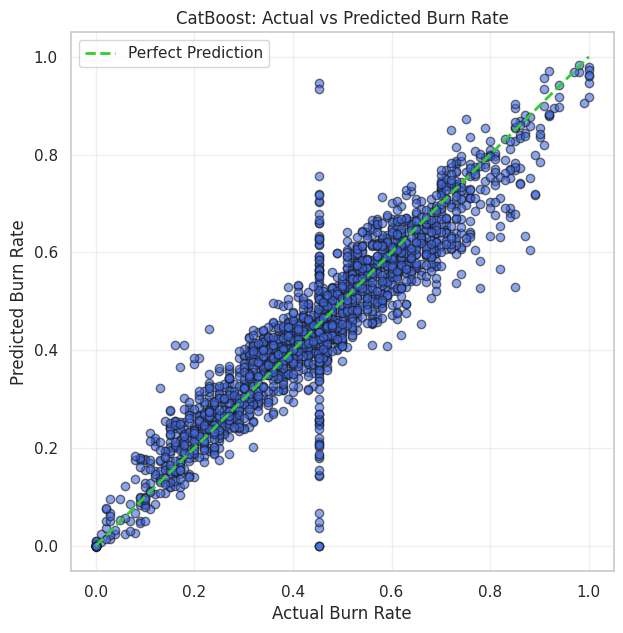

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on test split
y_pred_cat = cat_model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_cat, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='limegreen', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('CatBoost: Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


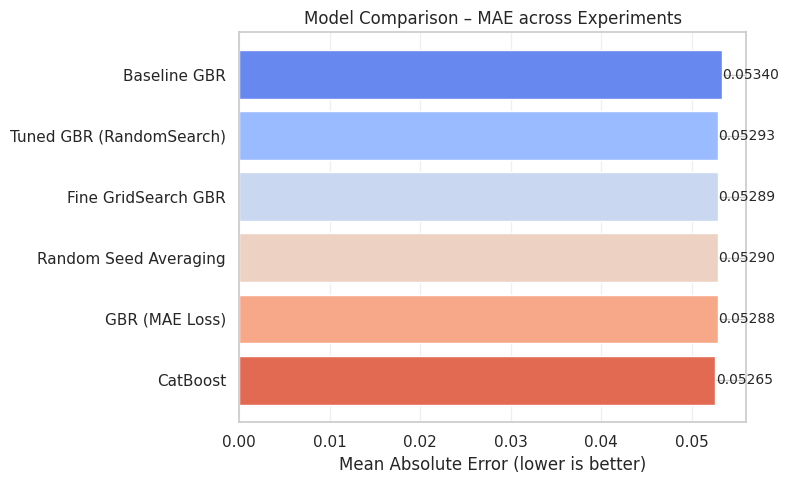

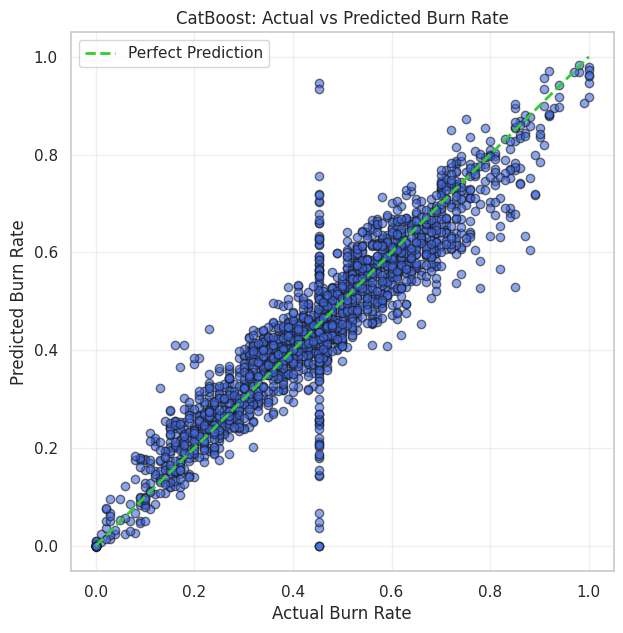

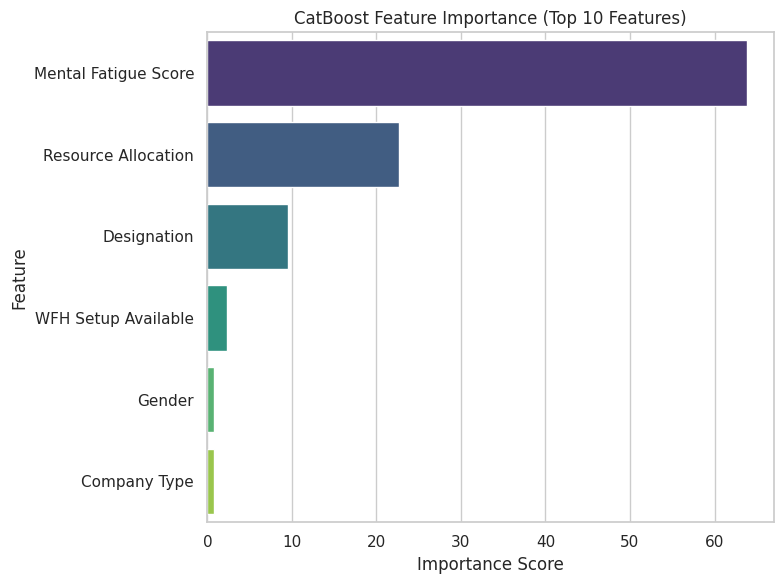

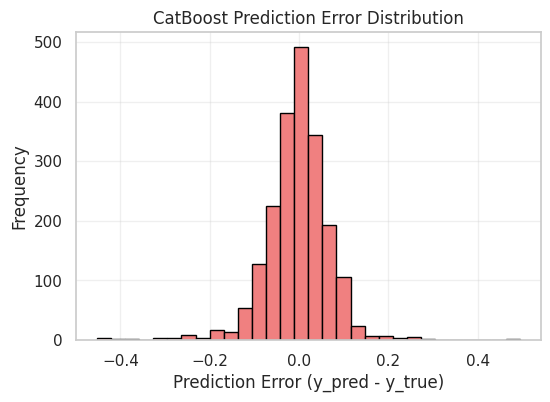

Visualizations completed – all models compared and CatBoost insights plotted.


In [46]:
# ===== Visualization & Model Insights =====
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Model comparison chart ---
models = [
    'Baseline GBR',
    'Tuned GBR (RandomSearch)',
    'Fine GridSearch GBR',
    'Random Seed Averaging',
    'GBR (MAE Loss)',
    'CatBoost'
]
mae_scores = [0.0534, 0.05293, 0.05289, 0.05290, 0.05288, 0.05265]

plt.figure(figsize=(8,5))
bars = plt.barh(models, mae_scores, color=sns.color_palette("coolwarm", len(models)))
plt.xlabel("Mean Absolute Error (lower is better)")
plt.title("Model Comparison – MAE across Experiments")
plt.gca().invert_yaxis()  # show best on top
for bar, score in zip(bars, mae_scores):
    plt.text(score + 0.00002, bar.get_y() + bar.get_height()/2,
             f"{score:.5f}", va='center', fontsize=10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2. Actual vs Predicted for CatBoost ---
y_pred_cat = cat_model.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_cat, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='limegreen', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('CatBoost: Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 3. Feature Importance (CatBoost) ---
feature_importance = cat_model.get_feature_importance(prettified=True)
plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance.head(10),
            x='Importances', y='Feature Id',
            palette='viridis')
plt.title('CatBoost Feature Importance (Top 10 Features)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- 4. Error distribution ---
errors = y_pred_cat - y_test
plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, color='lightcoral', edgecolor='black')
plt.title('CatBoost Prediction Error Distribution')
plt.xlabel('Prediction Error (y_pred - y_true)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

print("Visualizations completed – all models compared and CatBoost insights plotted.")
